### **Assignment 1,2,3 FML**  : **Sahar KH.Koolaee**

##### **Student Number: 1811934**

### **1. Importing libraries and data sets**


In [142]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn as sk
import math
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [143]:
df1 = pd.read_csv("steps.csv", sep=";")
df1 = df1.fillna(0)
df1.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
df2 = pd.read_csv('survey.csv')
df2

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0


### **2. Clean the data : remove impossible values**


In [145]:
df3 = df2[df2["height"]>10]
df3.dropna()
df3

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0
...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0


In [146]:
df3 = df3[df3["weight"]<250]
df3 = df3.sort_values(by='weight', ascending=False)
df3

,id,city,gender,age,hh_size,education,education_1,height,weight
549,550,Lille,Male,45-54,1,1,Bachelor,193.0,155.0
820,821,Lille,Female,25-34,3,4,Master or doctorate,160.0,155.0
257,258,Lille,Male,25-34,4,4,Bachelor,183.0,149.0
890,891,Bordeaux,Female,45-54,1,1,Bachelor,167.0,140.0
25,26,Lille,Male,35-44,4,4,High school,185.0,140.0
...,...,...,...,...,...,...,...,...,...
67,68,Lyon,Female,35-44,5,4,Bachelor,150.0,45.0
387,388,Lille,Female,25-34,2,2,Bachelor,158.0,45.0
102,103,Bordeaux,Female,25-34,2,2,Bachelor,157.0,37.0
840,841,Lille,Female,35-44,3,4,High school,158.0,20.0


 ### **3.Merging two data sets**

In [147]:
df = pd.merge(df1, df3, on = 'id') 
df.dropna()
df.head(5)


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


### **4.Creating mean steps variable per participant**

In [148]:
df["mean_steps"] = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1)   #axis=1 for calculating mean over all columns
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927


### **5.An analysis of mean steps per participant**
#### *a. Graph of the distribution: histogram and boxplot*

c:\Users\Sahar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Sahar\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


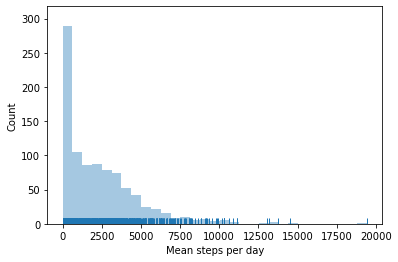

In [149]:
sns.distplot(df["mean_steps"], rug=True, kde=False) 
plt.xlabel("Mean steps per day")
plt.ylabel("Count")
plt.show()

Some things to note about this distribution:
* It has 1 peak (*unimodal*)
* It has a 'tail' on the right (*right-skewed*)

c:\Users\Sahar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


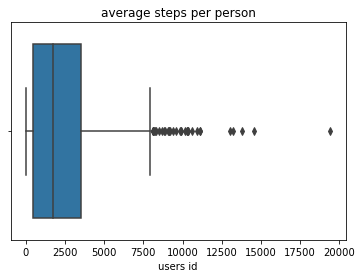

In [150]:
sns.boxplot(df['mean_steps'])
plt.title('average steps per person')
plt.xlabel('users id')
plt.show()

In [151]:
print('median: ' + str(float(df[['mean_steps']].median())))
print('mode: ' + str(df[['mean_steps']].mode()['mean_steps'][0]))
print('mean: ' + str(float(df[['mean_steps']].mean())))
print('standard deviation: ' + str(float(df[['mean_steps']].std())))
print('variance: ' + str(float(df[['mean_steps']].var())))

median: 1697.4268292682927
mode: 0.0
mean: 2364.5434047462077
standard deviation: 2434.9926929520793
variance: 5929189.414730019


### **b. Summary statistics**
* Data are not normalized.
* skewed to the Right.
* median is about 1697 while the mean is around 2364.
* there is one user active far compared to other users (with an average of 20000 steps per day.
50 percent of the user are moderately low active (between 500 to 3500 steps per day)
 


### **6. The relation of mean steps per participant with categorical variables**

c:\Users\Sahar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Sahar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Sahar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Sahar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age', ylabel='mean_steps'>

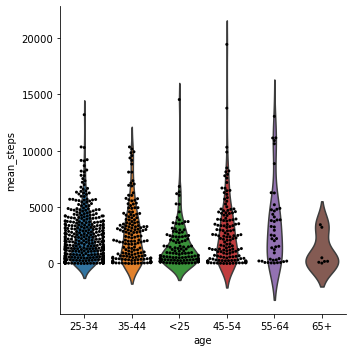

In [152]:
g = sns.catplot(data=df, x="age", y="mean_steps", kind="violin", inner=None)
sns.swarmplot(data=df, x="age", y="mean_steps", color="k", size=3, ax=g.ax)

c:\Users\Sahar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Sahar\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Mean steps by gender')

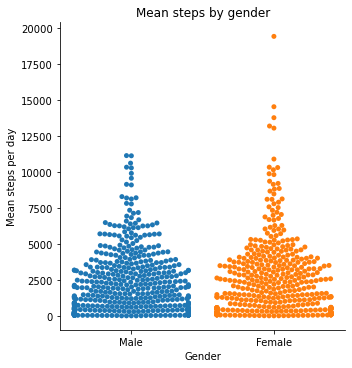

In [153]:
df_subset = df[["gender", "mean_steps"]].dropna() #select only the variables to plot to avoid warning because of NA's

sns.catplot(data = df_subset, x = "gender", y = "mean_steps", kind = "swarm") #swarm plot
plt.xlabel("Gender") 
plt.ylabel("Mean steps per day")
plt.title("Mean steps by gender")

### 7. Computing the BMI variable as an indicator of a healthy weight.

In [156]:
BMI= round(df["weight"]/(df["height"]* df["height"]/10000),2)

BMI.head()

0    30.93
1    23.77
2    25.62
3    25.25
4    21.87
dtype: float64

In [157]:
df = df.merge(BMI.rename('BMI'),left_index=True, right_index=True)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,BMI
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000,30.93
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951,23.77
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439,25.62
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585,25.25
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927,21.87


In [158]:
df = df.sort_values(by='height', ascending=False)
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,BMI
211,213,0.0,0.0,21427.0,18605.0,8982.0,11590.0,15059.0,8132.0,8035.0,...,Bordeaux,Female,35-44,5,4,Bachelor,195.0,79.0,3171.716463,20.78
38,39,0.0,10375.0,10097.0,9027.0,3507.0,10116.0,15596.0,10151.0,9324.0,...,Lille,Male,45-54,1,2,Master or doctorate,195.0,90.0,3482.862805,23.67
915,919,0.0,0.0,0.0,0.0,0.0,17240.0,7613.0,20981.0,14548.0,...,Montpellier,Female,<25,2,2,Bachelor,195.0,93.0,1290.521341,24.46
547,550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lille,Male,45-54,1,1,Bachelor,193.0,155.0,69.835366,41.61
318,321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lyon,Male,25-34,2,2,Master or doctorate,192.0,99.0,37.603659,26.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lille,Female,<25,2,3,Bachelor,152.0,96.0,344.283537,41.55
872,876,0.0,7180.0,10762.0,10057.0,8246.0,11243.0,14157.0,0.0,12744.0,...,Bordeaux,Female,35-44,2,2,High school,151.0,50.0,3720.579268,21.93
904,908,0.0,15122.0,24802.0,11761.0,13190.0,20230.0,20281.0,7309.0,24906.0,...,Lille,Female,45-54,4,4,Bachelor,150.0,72.0,13775.759146,32.00
66,68,0.0,8806.0,24802.0,12063.0,12871.0,14202.0,23336.0,14949.0,24906.0,...,Lyon,Female,35-44,5,4,Bachelor,150.0,45.0,5136.487805,20.00


In [159]:
df = df.sort_values(by='weight', ascending=False)
df

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,BMI
818,821,0.0,0.0,0.0,3410.0,10224.0,0.0,7613.0,9185.0,10541.0,...,Lille,Female,25-34,3,4,Master or doctorate,160.0,155.0,2162.865854,60.55
547,550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lille,Male,45-54,1,1,Bachelor,193.0,155.0,69.835366,41.61
256,258,0.0,0.0,0.0,0.0,3790.0,154.0,7137.0,4704.0,13440.0,...,Lille,Male,25-34,4,4,Bachelor,183.0,149.0,1337.774390,44.49
581,584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lille,Male,25-34,2,2,High school,180.0,140.0,42.402439,43.21
25,26,164.0,5766.0,3025.0,2806.0,240.0,6988.0,0.0,0.0,0.0,...,Lille,Male,35-44,4,4,High school,185.0,140.0,4367.387195,40.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Lille,Female,25-34,2,2,Bachelor,158.0,45.0,3201.728659,18.03
69,71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4599.0,6105.0,...,Montpellier,Female,35-44,2,2,High school,164.0,45.0,42.307927,16.73
101,103,0.0,0.0,0.0,4176.0,6181.0,2968.0,0.0,13388.0,8409.0,...,Bordeaux,Female,25-34,2,2,Bachelor,157.0,37.0,2364.161585,15.01
838,841,0.0,13586.0,15098.0,11216.0,20671.0,12447.0,23336.0,11271.0,12773.0,...,Lille,Female,35-44,3,4,High school,158.0,20.0,9819.375000,8.01


### 8. Make a scatterplot matrix of the numerical variables

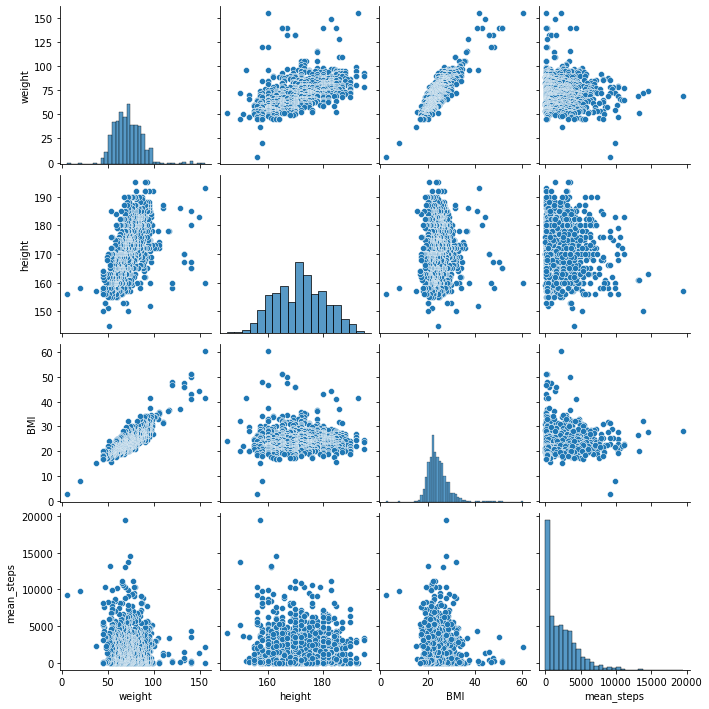

In [160]:
df4 = df[["weight", "height", "BMI", "mean_steps"]]
sns.pairplot(df4)
plt.show() 

### 9. Make a correlation matrix of the numerical variables

Text(0.5, 1.0, 'BMI of fitbit users per steps')

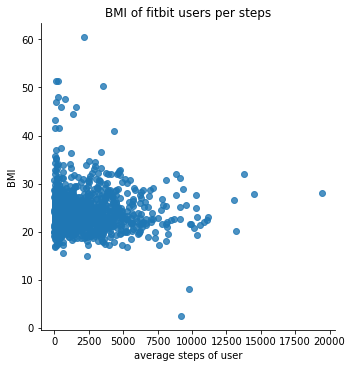

In [165]:
sns.lmplot(x ='mean_steps', y ='BMI', fit_reg = False, data = df4)
plt.xlabel('average steps of user') 
plt.ylabel('BMI')
plt.title('BMI of fitbit users per steps')

In [166]:
df4.dropna()

,weight,height,BMI,mean_steps
818,155.0,160.0,60.55,2162.865854
547,155.0,193.0,41.61,69.835366
256,149.0,183.0,44.49,1337.774390
581,140.0,180.0,43.21,42.402439
25,140.0,185.0,40.91,4367.387195
...,...,...,...,...
385,45.0,158.0,18.03,3201.728659
69,45.0,164.0,16.73,42.307927
101,37.0,157.0,15.01,2364.161585
838,20.0,158.0,8.01,9819.375000


In [171]:
from scipy.stats.stats import pearsonr
print(pearsonr(df4['mean_steps'],df4['BMI']))
print(pearsonr(df4['mean_steps'],df4['BMI']))
corr = df4[['weight', 'mean_steps', 'BMI']].corr() 
corr


(-0.07795816491168306, 0.017720421926253026)
(-0.07795816491168306, 0.017720421926253026)


,weight,mean_steps,BMI
weight,1.000000,-0.107259,0.871413
mean_steps,-0.107259,1.000000,-0.077958
BMI,0.871413,-0.077958,1.000000


### 10. Create dummy variables for the categorical variables

In [164]:
dummies = pd.get_dummies(df['gender'])
pd.get_dummies(df['gender'])
df = pd.concat([df4, dummies], axis=1)
df .head()

,weight,height,BMI,mean_steps,Female,Male
818,155.0,160.0,60.55,2162.865854,1,0
547,155.0,193.0,41.61,69.835366,0,1
256,149.0,183.0,44.49,1337.774390,0,1
581,140.0,180.0,43.21,42.402439,0,1
25,140.0,185.0,40.91,4367.387195,0,1


### 11. Fit a linear regression model to predict the mean steps per participant

In [170]:
from sklearn.linear_model import LinearRegression 
x = df4[['BMI']] 
y = df4['mean_steps']
lm = LinearRegression() 
lm.fit(x, y) 

b0 = lm.intercept_ 
b1 = lm.coef_[0] 

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") 

The regression line is equal to y = 3350.276 + -40.401X


### 12. Evaluation

In [172]:
df4['mean_steps_p'] = lm.predict(x)
df4.head(10)

C:\Users\Sahar\AppData\Local\Temp\ipykernel_8484\2717183872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['mean_steps_p'] = lm.predict(x)


,weight,height,BMI,mean_steps,mean_steps_p
818,155.0,160.0,60.55,2162.865854,903.973376
547,155.0,193.0,41.61,69.835366,1669.175215
256,149.0,183.0,44.49,1337.774390,1552.819286
581,140.0,180.0,43.21,42.402439,1604.533032
25,140.0,185.0,40.91,4367.387195,1697.456170
887,140.0,167.0,50.20,3525.484756,1322.127496
321,140.0,165.0,51.42,250.152439,1272.837832
388,140.0,165.0,51.42,105.902439,1272.837832
787,133.0,170.0,46.02,489.304878,1491.005198
484,133.0,167.0,47.69,769.594512,1423.534920


In [173]:

df4['resid'] = df4['mean_steps'] - df4['mean_steps_p'] 

C:\Users\Sahar\AppData\Local\Temp\ipykernel_8484\1835780755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['resid'] = df4['mean_steps'] - df4['mean_steps_p']


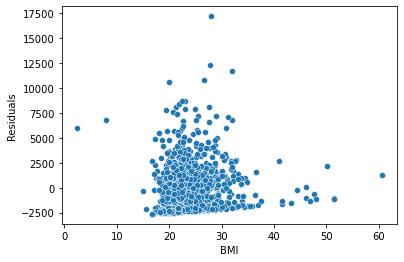

In [174]:
sns.scatterplot(x='BMI',y='resid',data=df4)
plt.xlabel('BMI')
plt.ylabel('Residuals')
plt.show()

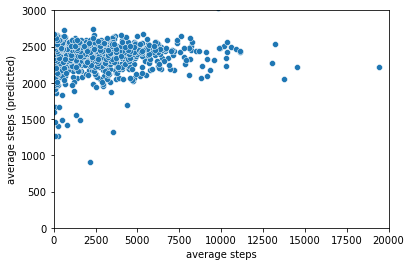

In [176]:
sns.scatterplot(x='mean_steps',y='mean_steps_p',data=df4)
plt.xlim(0, 20000) 
plt.ylim(0, 3000) 
plt.xlabel('average steps')
plt.ylabel('average steps (predicted)')
plt.show()

In [177]:
from sklearn.metrics import r2_score
r2_score(df4['mean_steps'], df4['mean_steps_p'])

0.006077475476397365

In [178]:
math.sqrt(mean_squared_error(df4['mean_steps'], df4['mean_steps_p']))

2426.2695508093125